<a href="https://www.kaggle.com/code/ernestofrancochavez/2021-tokyo-olympic-analysis?scriptVersionId=229679957" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx
/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx
/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx
/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx
/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx


# Data cleaning


In [2]:
#Reading databases
Athletes_data = pd.read_excel("/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx")
Coaches_data = pd.read_excel("/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx")
EntriesGender_data = pd.read_excel("/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx")
Medals_data = pd.read_excel("/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx")
Teams_data = pd.read_excel("/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx")


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
print(Athletes_data.head(),"\n")
Athletes_data.info()

                Name     NOC           Discipline
0    AALERUD Katrine  Norway         Cycling Road
1        ABAD Nestor   Spain  Artistic Gymnastics
2  ABAGNALE Giovanni   Italy               Rowing
3     ABALDE Alberto   Spain           Basketball
4      ABALDE Tamara   Spain           Basketball 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


In [4]:
print(Coaches_data.head(), "\n")
Coaches_data.info() 

              Name            NOC  Discipline Event
0  ABDELMAGID Wael          Egypt    Football   NaN
1        ABE Junya          Japan  Volleyball   NaN
2    ABE Katsuhiko          Japan  Basketball   NaN
3     ADAMA Cherif  Côte d'Ivoire    Football   NaN
4       AGEBA Yuya          Japan  Volleyball   NaN 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        394 non-null    object
 1   NOC         394 non-null    object
 2   Discipline  394 non-null    object
 3   Event       249 non-null    object
dtypes: object(4)
memory usage: 12.4+ KB


#### The Event column has 145 null values, as it is a categorical data type, it is left as it is.

In [5]:
print(EntriesGender_data.head(),"\n")
EntriesGender_data.info()

            Discipline  Female  Male  Total
0       3x3 Basketball      32    32     64
1              Archery      64    64    128
2  Artistic Gymnastics      98    98    196
3    Artistic Swimming     105     0    105
4            Athletics     969  1072   2041 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


In [6]:
print(Medals_data.head(), "\n")
Medals_data.info()

   Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0     1    United States of America    39      41      33    113   
1     2  People's Republic of China    38      32      18     88   
2     3                       Japan    27      14      17     58   
3     4               Great Britain    22      21      22     65   
4     5                         ROC    20      28      23     71   

   Rank by Total  
0              1  
1              2  
2              5  
3              4  
4              3   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-nu

In [7]:
print(Teams_data.head(),"\n")
Teams_data.info()

      Name      Discipline                         NOC  Event
0  Belgium  3x3 Basketball                     Belgium    Men
1    China  3x3 Basketball  People's Republic of China    Men
2    China  3x3 Basketball  People's Republic of China  Women
3   France  3x3 Basketball                      France  Women
4    Italy  3x3 Basketball                       Italy  Women 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB


# Data analysis

In [8]:
from IPython.display import display, Markdown

### Question 1: How many countries participated?

In [9]:
num_country = Athletes_data["NOC"].nunique()
display(Markdown(f"`{num_country}` **countries participated**"))

`206` **countries participated**

### Question 2: How many athletes participated?

In [10]:
num_athletes = Athletes_data.shape[0]
display(Markdown(f"`{num_athletes}` **athletes participated**"))

`11085` **athletes participated**

### Question 3: Which countries had the most participants?

In [11]:
Participant_country = Athletes_data.groupby(["NOC"]).size().reset_index(name="Count")
Participant_country = Participant_country.sort_values(by="Count", ascending=False)

In [12]:
top_10_participant = Participant_country.head(10)

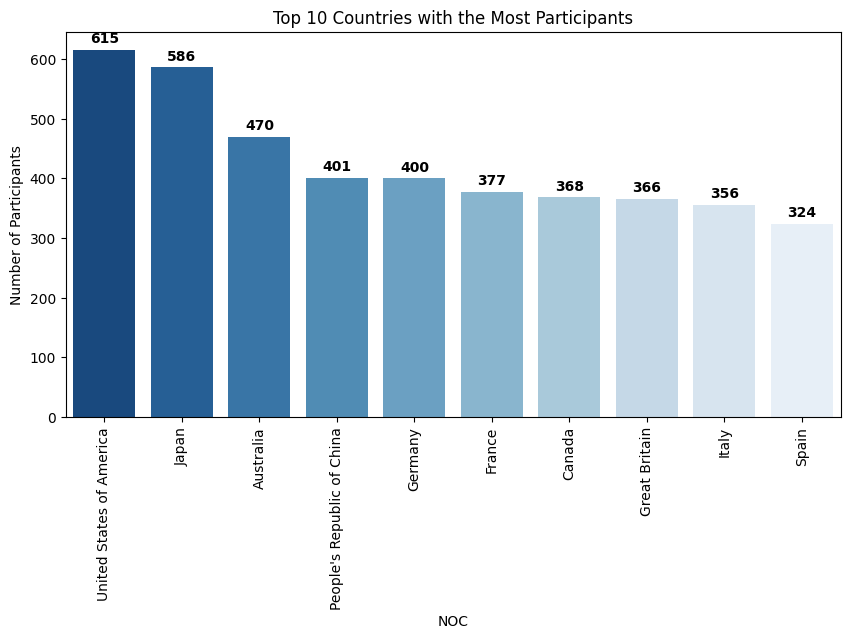

In [13]:
fig1, ax1 = plt.subplots(figsize = (10,5))
bars = sns.barplot(x = "NOC", y = "Count", 
                   data = top_10_participant, palette = "Blues_r", ax = ax1)
ax1.bar_label(bars.containers[0], fmt = '%d', padding = 3, fontsize = 10, fontweight = 'bold')
ax1.set_xlabel("NOC")
ax1.set_ylabel("Number of Participants")
ax1.set_title("Top 10 Countries with the Most Participants")
plt.xticks(rotation = 'vertical')

plt.show()

In [14]:
min_count = Participant_country['Count'].min()
noc_with_min_count = Participant_country[Participant_country['Count'] == min_count]
print("Number of countries with the minimum number of participants:",noc_with_min_count.shape[0])
noc_with_min_count

Number of countries with the minimum number of participants: 17


,NOC,Count
21,Bermuda,2
128,Nauru,2
126,Myanmar,2
4,Andorra,2
198,Vanuatu,2
171,Somalia,2
54,Dominica,2
105,Lesotho,2
194,United Republic of Tanzania,2
117,Marshall Islands,2


#### The countries with the most participants were: USA (615), Japan (586), and Australia (470). There were 17 countries with 2 participants.

### Question 4: In which discipline did the most countries participated?

In [15]:

Discipline_country = Teams_data.groupby("Discipline")["NOC"].nunique().reset_index(name="Countries")
Discipline_country = Discipline_country.sort_values(by = "Countries", ascending = False)

Discipline_country

,Discipline,Countries
4,Athletics,33
1,Archery,31
15,Swimming,30
16,Table Tennis,25
10,Football,24
7,Beach Volleyball,23
8,Cycling Track,23
3,Artistic Swimming,22
18,Volleyball,18
6,Basketball,18


In [16]:
top_10_disciplines = Discipline_country.head(10)

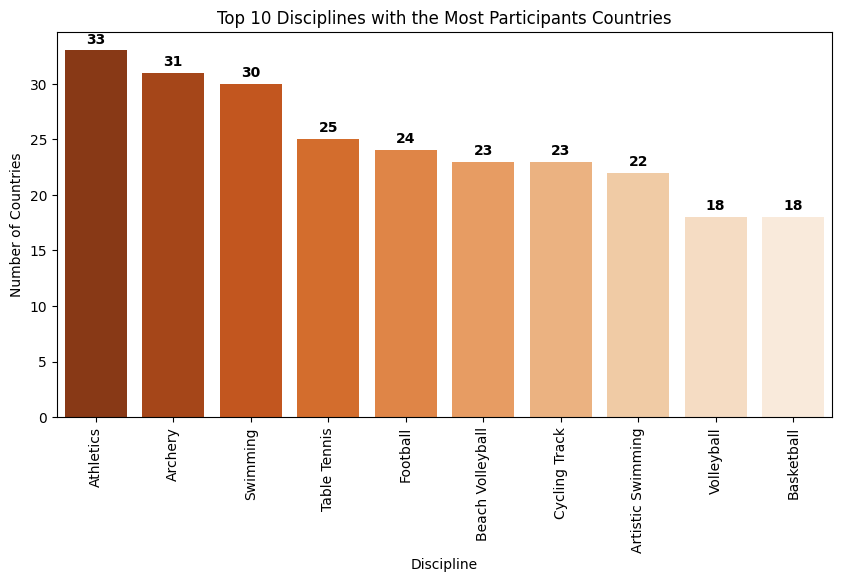

In [17]:
fig2, ax1 = plt.subplots(figsize=(10,5))
bars = sns.barplot(x = "Discipline", y = "Countries", 
                   data = top_10_disciplines , palette = "Oranges_r", ax = ax1)
ax1.bar_label(bars.containers[0], fmt = '%d', padding = 3, fontsize = 10, fontweight = 'bold')
ax1.set_xlabel("Discipline")
ax1.set_ylabel("Number of Countries")
ax1.set_title("Top 10 Disciplines with the Most Participants Countries")
plt.xticks(rotation = "vertical")

plt.show()

#### The disciplines with the most participating nations were: Athletics (33), Archery (31), Swimming (30). The disciplines with the fewest participating nations were: Baseball/Softball (9), 3x3 Basketball (13), Hockey (14).

### Question 5: Is there a relationship between the number of coaches and the medal results?

In [18]:
#Coaches by NOC
Coaches_by_noc = Coaches_data.groupby("NOC")["Name"].count().reset_index(name="Count")

#Medals by NOC
Medals_total = Medals_data[["Team/NOC", "Total"]].rename(columns={"Team/NOC": "NOC"})

In [19]:
Participant_country.rename(columns = {"Count": "Participants"},inplace=True)

In [20]:
merged_df = pd.merge(Medals_total, Participant_country,
                     on="NOC", how="left")

merged_df = pd.merge(merged_df, Coaches_by_noc,
                     on="NOC", how="left").fillna({"Count": 0})

merged_df.rename(columns={"NOC": "Country", "Total": "Medals", 
                          "Count": "Coaches"}, inplace=True)
merged_df

,Country,Medals,Participants,Coaches
0,United States of America,113,615,28.0
1,People's Republic of China,88,401,12.0
2,Japan,58,586,35.0
3,Great Britain,65,366,7.0
4,ROC,71,318,12.0
...,...,...,...,...
88,Ghana,1,14,0.0
89,Grenada,1,6,0.0
90,Kuwait,1,10,0.0
91,Republic of Moldova,1,19,0.0


In [21]:
corr_matrix = merged_df.corr(numeric_only=True)
corr_matrix["Medals"].sort_values(ascending=False)

Medals          1.000000
Participants    0.875115
Coaches         0.691020
Name: Medals, dtype: float64

#### The number of medals has a strong correlation with the number of coaches (r = 0.7) and the number of participants (r = 0.9), which means that the more participants and coaches a country has, the more medals it is expected to win, which was to be expected.

# Final Analysis
- Despite the health crisis caused by COVID-19, all IOC member countries (206) participated in the Tokyo 2020 Olympic Games.

- There was a decrease of 466 athletes in the Tokyo Olympic Games compared to the Rio de Janeiro 2016 Games, mainly due to the health crisis experienced in 2020.

- The countries with the highest number of athletes were the USA, Japan, and Australia, while 17 countries had only two participants during the games. This contrast may be due to the sports stimulation among the inhabitants of each country.

- The disciplines with the highest number of participating countries were: Athletics, Archery, and Swimming.

- For a nation to expect a large number of medals, it would need to have a large number of participants and coaches to increase the chances of winning medals. There is a correlation between these variables, but they are not the cause
